In [1]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import sqlite3
import os
from datetime import datetime, timedelta
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data/financials.db')
con = sqlite3.connect(db_path)
data = pd.read_sql("SELECT * FROM economic_indicators", con=con, index_col="id")

In [4]:
data['date'] = pd.to_datetime(data['date'])
vals_to_replace = {
    'Consumer Price Index for all Urban Consumers': "CPI",
    'Unemployment Rate': "Unemployment",
    '10-Year Treasury Constant Maturity Rate': "10-Year Treasury Yield",
    '5-Year Treasury Constant Maturity Rate': "5-Year Treasury Yield",
    'Effective Federal Funds Rate': "Interest Rate",
    '7-Year Treasury Constant Maturity Rate': "7-Year Treasury Yield",
    '2-Year Treasury Constant Maturity Rate': "2-Year Treasury Yield",
    '30-Year Treasury Constant Maturity Rate': "30-Year Treasury Yield",
    '3-Month Treasury Constant Maturity Rate': "3-Month Treasury Yield",
    'Advance Retail Sales: Retail Trade': "Retail Trade",
    'Manufacturer New Orders: Durable Goods': "Durable Goods",
    'Real Gross Domestic Product per Capita': "GDP per Capita",
    'Real Gross Domestic Product': "GDP",
    'Inflation - US Consumer Prices': "Inflation"
}
data['economic_indicator'] = data['economic_indicator'].replace(vals_to_replace)

def split_text(text):
    pattern = re.compile(r'(^\d+-(?:Month|Year))\s(.*)')
    match = re.match(pattern, text)
    if match:
        return match.groups()
    else:
        return np.nan, text

data[['maturity','economic_indicator']] = data['economic_indicator'].apply(lambda x: pd.Series(split_text(x)))

In [5]:
data_recent = data[data.date.dt.year >= 2000]

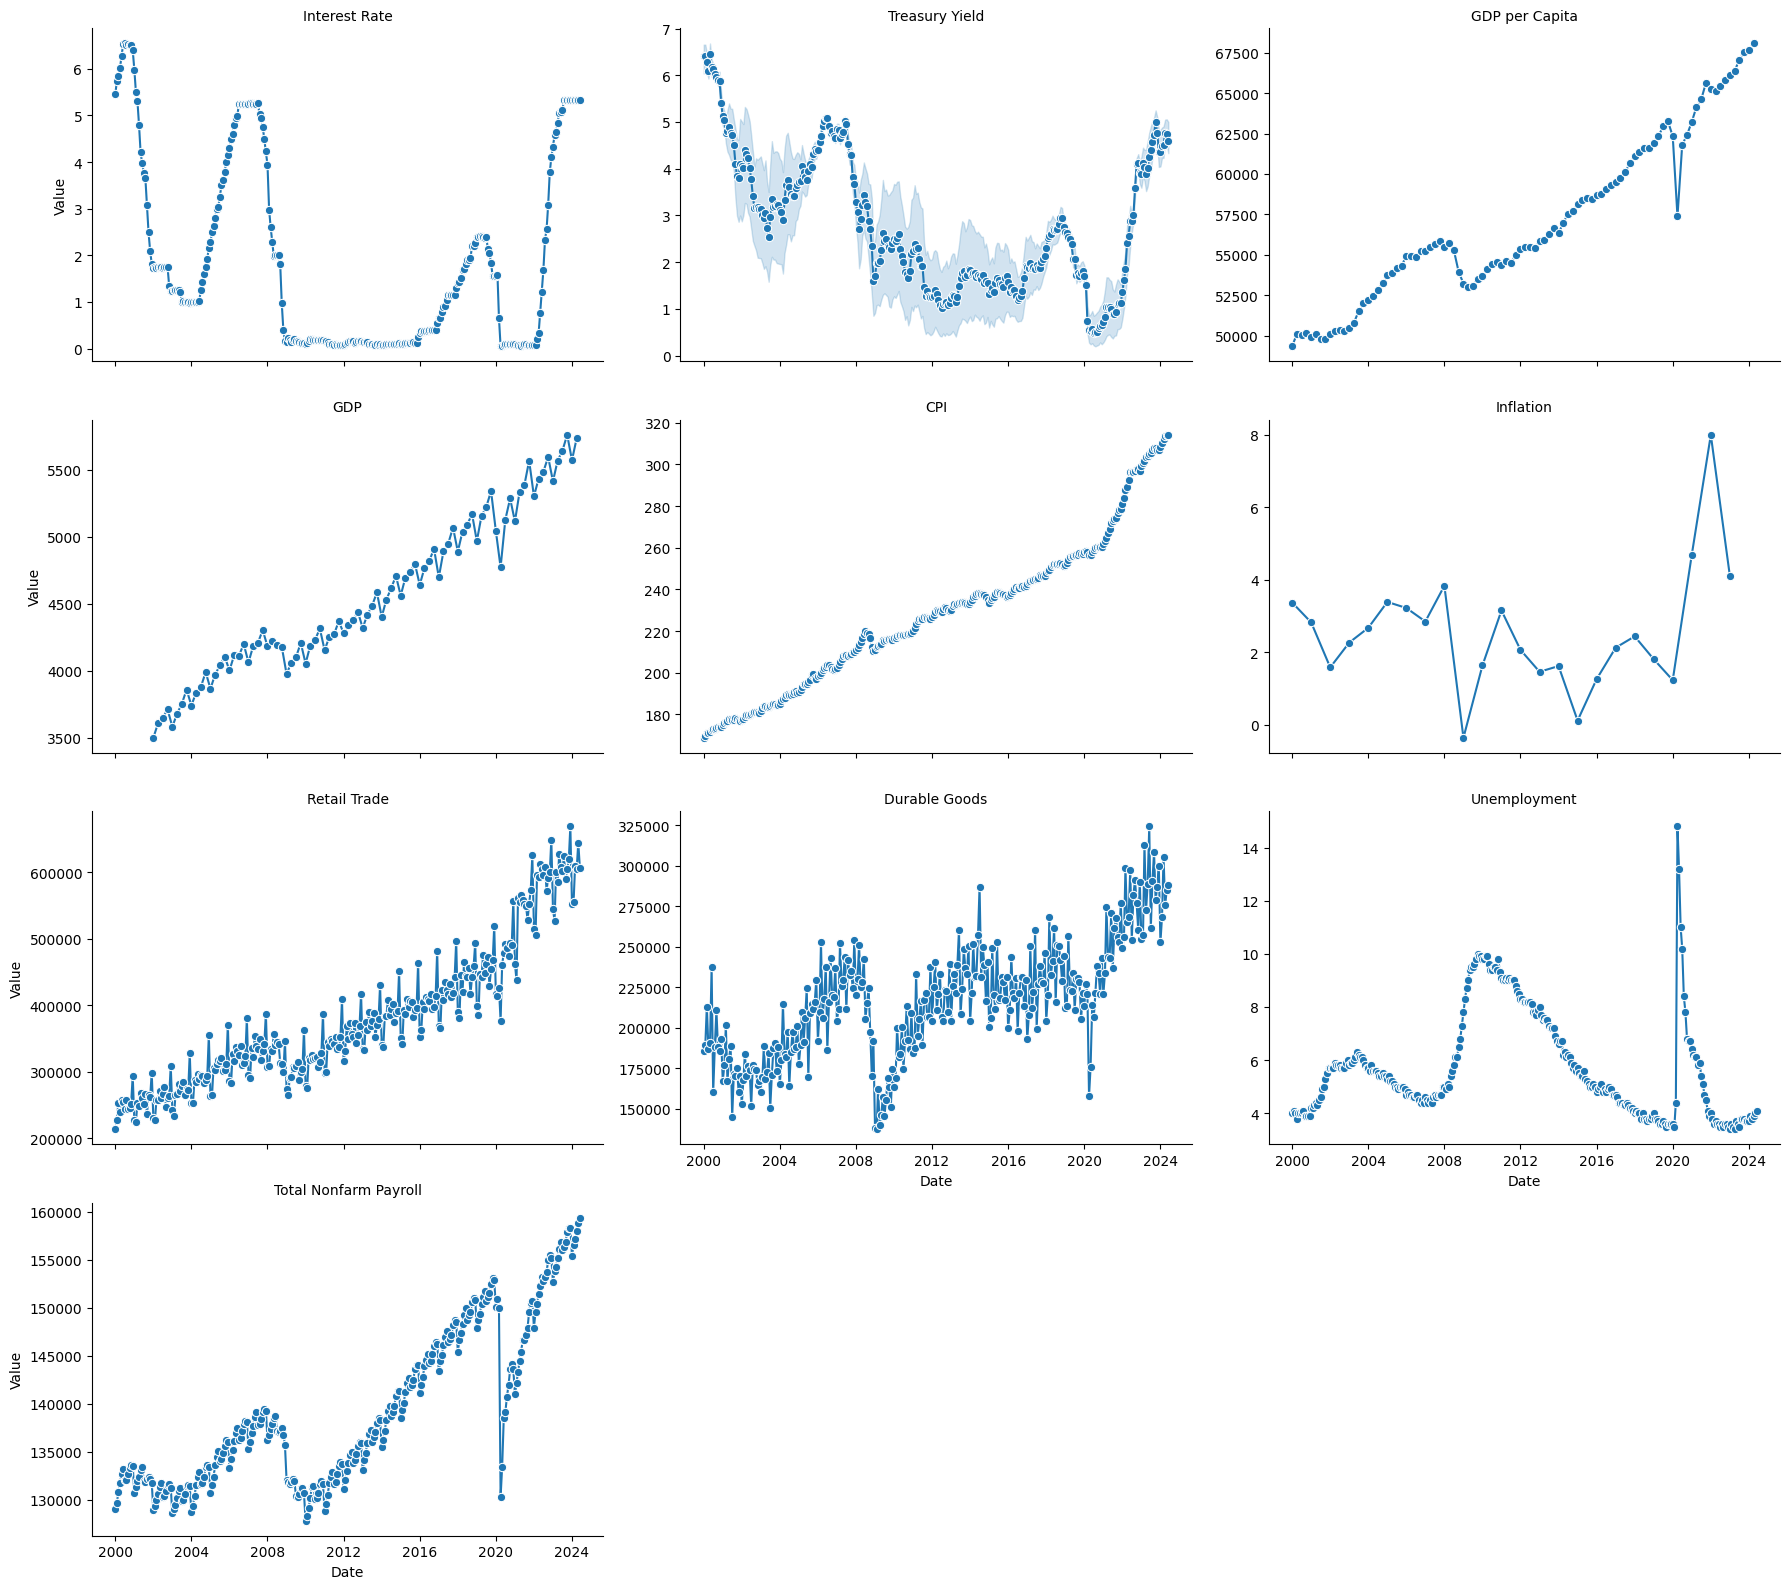

In [6]:

grid = sns.FacetGrid(data_recent, col='economic_indicator', col_wrap=3, height=4, aspect=1.5, sharey=False)
grid.map_dataframe(sns.lineplot, x='date', y='value', marker='o')

grid.set_titles("{col_name}")
grid.set_axis_labels("Date", "Value")
plt.tight_layout()